# Análise de dados Bitcoin

## Importando a biblioteca pandas

In [2]:
import pandas as pd

## Lendo o arquivo de dados e armazenando numa variável

In [3]:
dados_bitcoin = pd.read_csv("C:/Users/jmatm/Desktop/Bitcoin Historical Data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

In [4]:
dados_bitcoin

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


## Um pouquinho de limpeza: deletar os valores NaN

In [5]:
dados_bitcoin = dados_bitcoin.dropna(how = 'any') # Utiliza o método dropna() para deletar as linhas
dados_bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


## Convertendo timestamp para data

In [6]:
from datetime import datetime

In [7]:
dados_bitcoin['Date_and_Time'] = pd.to_datetime(dados_bitcoin['Timestamp'], unit='s')
dados_bitcoin

C:\Users\jmatm\AppData\Local\Temp\ipykernel_4928\102612605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_bitcoin['Date_and_Time'] = pd.to_datetime(dados_bitcoin['Timestamp'], unit='s')


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date_and_Time
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00
...,...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021-03-30 23:56:00
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021-03-30 23:57:00
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021-03-30 23:58:00
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021-03-30 23:59:00


## Pergunta 1: Qual foi máxima histórica do valor do Bitcoin? Em qual data?

In [8]:
print("A máxima histórica do Bitcoin entre esses anos foi de {} em {}".format(max(dados_bitcoin['High']), dados_bitcoin.loc[dados_bitcoin.High == max(dados_bitcoin['High']), 'Date_and_Time'].values[0]))

A máxima histórica do Bitcoin entre esses anos foi de 61781.83 em 2021-03-13T20:42:00.000000000


## Plote o "closing price" do Bitcoin por minuto no mesmo dia da máxima histórica

In [9]:
dados_bitcoin_high_minuto = dados_bitcoin[["High", "Date_and_Time"]]
dados_bitcoin_high_minuto

,High,Date_and_Time
0,4.39,2011-12-31 07:52:00
478,4.39,2011-12-31 15:50:00
547,4.57,2011-12-31 16:59:00
548,4.58,2011-12-31 17:00:00
1224,4.58,2012-01-01 04:16:00
...,...,...
4857372,58714.31,2021-03-30 23:56:00
4857373,58693.43,2021-03-30 23:57:00
4857374,58723.84,2021-03-30 23:58:00
4857375,58770.38,2021-03-30 23:59:00


In [10]:
# O que preciso fazer: 
# Criar uma coluna adicional "Minutes_elapsed" ou algo do tipo que avalia quantos minutos se passaram
# desde à meia-noite do dia anterior até à meia-noite do dia que estamos estudando. Feito isso, para
# um mesmo dia, teremos o valor high do preço do Bitcoin e o minuto do dia correspondente. A data
# 2021-03-13 é fixa, mas as horas não são. Provavelmente devemos utilizar a função split() para
# separar a data e hora, e depois converter horas em minutos corridos.

## Retornando um subconjunto do dataframe

In [19]:
#data_type_date_and_time = dados_bitcoin_high_minuto['Date_and_Time'].dtype
#data_type_date_and_time
dados_bitcoin_high_minuto_subset = dados_bitcoin_high_minuto.loc[dados_bitcoin_high_minuto['Date_and_Time'].astype(str).str[0:10] == '2021-03-13' , ['High', 'Date_and_Time']]
dados_bitcoin_high_minuto_subset

,High,Date_and_Time
4831456,57297.67,2021-03-13 00:00:00
4831457,57177.68,2021-03-13 00:01:00
4831458,56994.28,2021-03-13 00:02:00
4831459,56980.71,2021-03-13 00:03:00
4831460,56890.12,2021-03-13 00:04:00
...,...,...
4832891,61331.85,2021-03-13 23:55:00
4832892,61342.10,2021-03-13 23:56:00
4832893,61286.15,2021-03-13 23:57:00
4832894,61281.17,2021-03-13 23:58:00


In [30]:
dados_bitcoin_high_minuto_subset['Minutes_elapsed'] = range(0,len(dados_bitcoin_high_minuto_subset))
dados_bitcoin_high_minuto_subset

,High,Date_and_Time,Minutes_elapsed
4831456,57297.67,2021-03-13 00:00:00,0
4831457,57177.68,2021-03-13 00:01:00,1
4831458,56994.28,2021-03-13 00:02:00,2
4831459,56980.71,2021-03-13 00:03:00,3
4831460,56890.12,2021-03-13 00:04:00,4
...,...,...,...
4832891,61331.85,2021-03-13 23:55:00,1429
4832892,61342.10,2021-03-13 23:56:00,1430
4832893,61286.15,2021-03-13 23:57:00,1431
4832894,61281.17,2021-03-13 23:58:00,1432


Text(0.5, 1.0, 'Price Vs Minutes for Bitcoin on 03-13-2021')

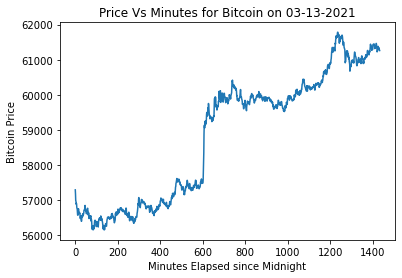

In [28]:
import matplotlib.pyplot as plt
plt.plot(dados_bitcoin_high_minuto_subset['Minutes_elapsed'], dados_bitcoin_high_minuto_subset['High'])
plt.xlabel("Minutes Elapsed since Midnight")
plt.ylabel("Bitcoin Price")
plt.title("Price Vs Minutes for Bitcoin on 03-13-2021")